<a href="https://colab.research.google.com/github/PhingSupanat/Senior_Project/blob/main/Crop_IMG_Senior_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# To mount at google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob
from PIL import Image, ImageChops

In [ ]:
folder = '/content/drive/MyDrive/Project/A2/'
dir_path1 = '/content/drive/MyDrive/Project/C_A2_Naildystrophy/'
dir_path2 = '/content/drive/MyDrive/Project/C_A2_Onychomycosis/'


for file_name in os.listdir(folder):

    source = folder + file_name
    # Load image, grayscale, Otsu's threshold
    image = cv2.imread(source)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Find contours, obtain bounding box, extract and save ROI
    ROI_number = 0
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]

        if w*h > 5500:

            if file_name[0] == "N":
                cv2.imwrite(f'{dir_path1}{file_name[:-4]}_{ROI_number}.png', ROI)
            elif file_name[0] == "O":
                cv2.imwrite(f'{dir_path2}{file_name[:-4]}_{ROI_number}.png', ROI)
            ROI_number += 1


FileNotFoundError: ignored

In [ ]:
print(source)

/content/drive/MyDrive/Project/C_A1_Naildystrophy/Naildystrophy_213_72.png


In [ ]:
print(f'{dir_path1}{file_name[:-4]}_{ROI_number}.png')

/content/drive/MyDrive/Project/C_A1_Naildystrophy/Onychomycosis_59_793.png


In [ ]:
x = "ABCD.png"
x[:-4]

'ABCD'

In [ ]:
import os

# folder path
dir_path = r'/content/drive/MyDrive/Project/C_A2_Onychomycosis/'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1563


<ipython-input-18-7f7702b94a28>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


IndexError: ignored

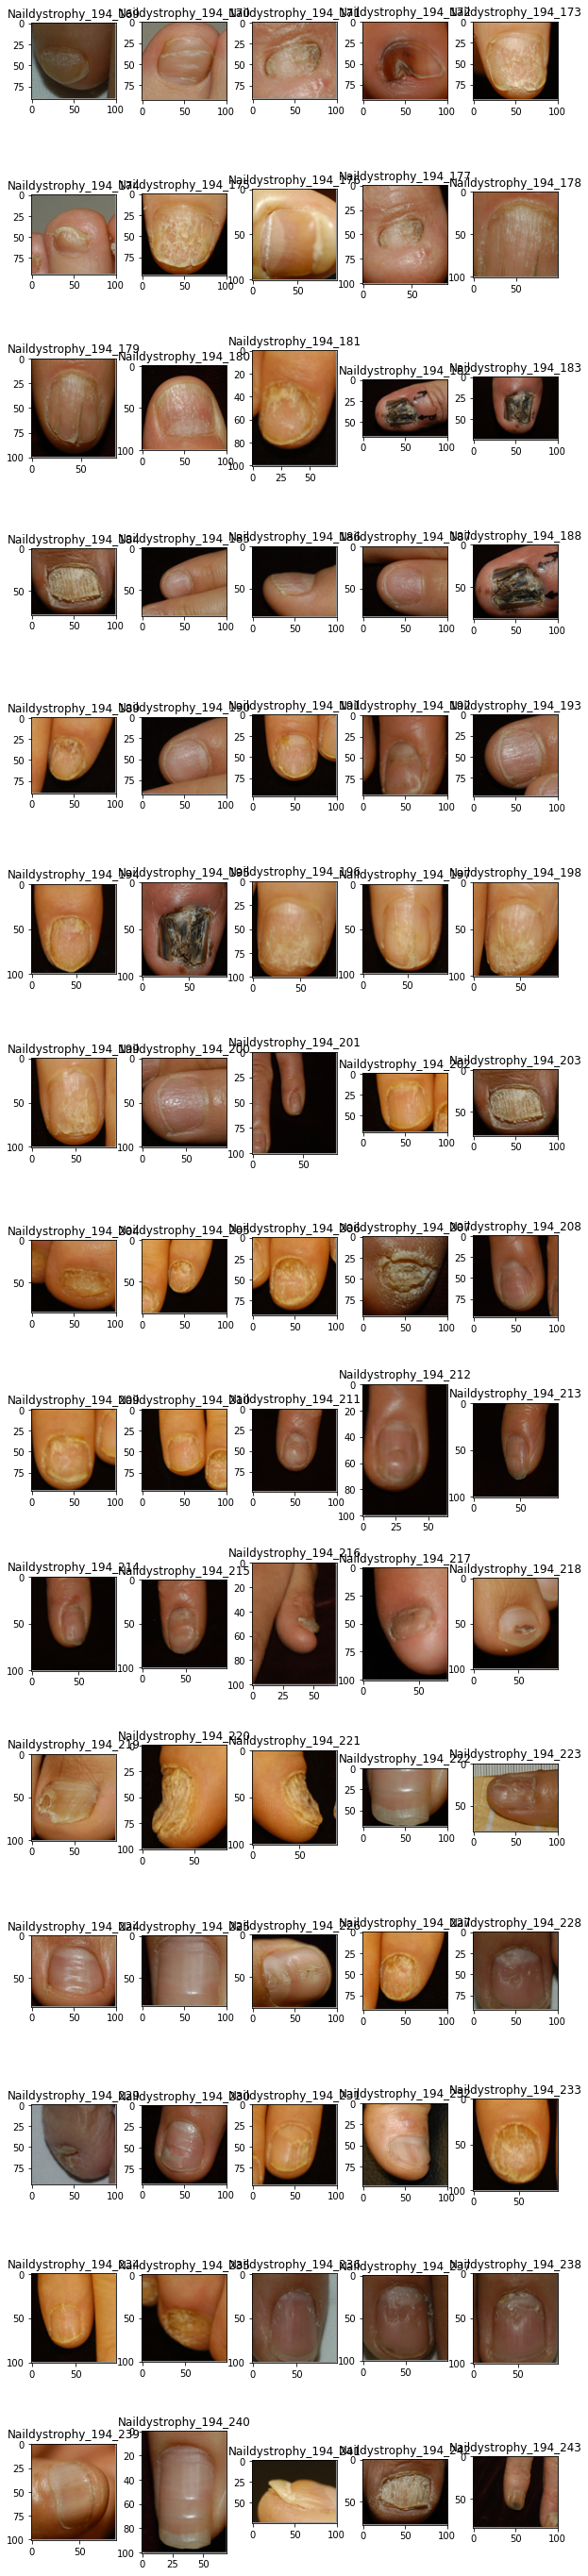

In [ ]:
folder1 = r'/content/drive/MyDrive/Project/C_A1_Naildystrophy/'
folder2 = r'/content/drive/MyDrive/Project/C_A1_Onychomycosis/'
folder3 = r'/content/drive/MyDrive/Project/C_A2_Naildystrophy/'
folder4 = r'/content/drive/MyDrive/Project/C_A2_Onychomycosis/'

dir_path = folder1

# Put all images in the folder into a list (works)
images = []
for f in glob.iglob('/content/drive/MyDrive/Project/C_A1_Naildystrophy/*'):
    images.append(np.asarray(Image.open(f)))

# plot the images (works)
images = np.array(images)
fig, axs = plt.subplots(15, 5, figsize=(10, 50))
fig.subplots_adjust(hspace = .3, wspace=.3)
axs = axs.ravel()

# This is for displaying the names (works)
for filename in os.listdir(dir_path):
  RatName = filename[:-4]

# show the filename (this bit doesn't work)
i = 0
for filename in os.listdir(dir_path):
  RatName = filename[:-4]
  axs[i].imshow(images[i])
  axs[i].set_title(RatName)
  i += 1

In [ ]:
dir_path1 = r'/content/drive/MyDrive/Project/C_A1_Naildystrophy/'
dir_path2 = r'/content/drive/MyDrive/Project/C_A1_Onychomycosis/'

i = 0

for file_name in os.listdir(dir_path1):

  source = dir_path1 + file_name
  im = cv2.imread(source)
  x, y, z = im.shape

  if x*y < 6000:
    print(f'Name : {file_name} Size : {x*y}')
    i += 1

print('Num ',i)

In [ ]:
source = dir_path + path
print(source)

/content/drive/MyDrive/Project/C_testoROI_0.png


In [ ]:
#Move Onychomycosis

import shutil

folder = r'/content/drive/MyDrive/Project/Cropped A1/'
path_to = r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/'

i = 0

for file_name in os.listdir(folder):

    source = folder + file_name
    direction = path_to + file_name

    if file_name[0] == 'O':
        shutil.move(source, direction)
        i += 1

    if i == 500:
      print(f'Sucessfully move {i} files to ',path_to)
      break


Sucessfully move 500 files to  /content/drive/MyDrive/Project/C_A1_Onychomycosis-01/


In [ ]:
#Move Naildystrophy

import shutil

folder = r'/content/drive/MyDrive/Project/Cropped A1/'
path_to = r'/content/drive/MyDrive/Project/C_A1_Naildystrophy-01/'

i = 0

for file_name in os.listdir(folder):

    source = folder + file_name
    direction = path_to + file_name

    if file_name[0] == 'N':
        shutil.move(source, direction)
        i += 1

    if i == 500:
      print(f'Sucessfully move {i} files to ',path_to)
      break


Sucessfully move 500 files to  /content/drive/MyDrive/Project/C_A1_Naildystrophy-01/


In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


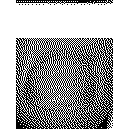

In [ ]:
import IPython.display as display
display.display(bw_im)

In [ ]:
from PIL import Image, ImageChops

#im = Image.open(r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/Onychomycosis_57_04_14.png')
im = Image.open(r'/content/drive/MyDrive/Project/Onychomycosis_59_15_01.png')

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((1,1)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
bw_im = im.convert('1')
diff = ImageChops.difference(im, bg)
diff2 = ImageChops.add(im, bg, 2.0, -100)
bbox = diff2.getbbox()

#cropped = trim(im)

#Clear Border

1294.5
[26, 61, 75, 45]
979.5
[18, 40, 95, 89]
389.0
[42, 39, 71, 23]
562.0
[9, 31, 104, 98]
307.0
[10, 0, 103, 10]


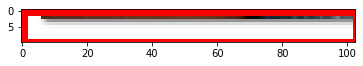

In [ ]:
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread(r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/Onychomycosis_57_04_14.png')
img = cv2.imread(r'/content/drive/MyDrive/Project/Onychomycosis_59_15_01.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)
MIN_CONTOUR_AREA=200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)

        #MIN_CONTOUR_AREA = cv2.contourArea(contour)
        print(cv2.contourArea(contour))


        cropped_image = img[Y:Y+H, X:X+W]
        print([X,Y,W,H])
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

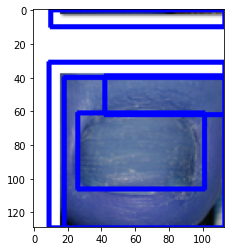

In [ ]:
plt.imshow(img)

In [ ]:
img_thresh

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
im = Image.open(r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/Onychomycosis_57_04_14.png')

bw_im = im.convert('1')
bbox = bw_im.getbbox()
cropped_im = im.crop((0,0,100,100))

In [ ]:
import sys, cv2
import numpy as np

im = cv2.imread(r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/Onychomycosis_57_04_14.png')
h,w,d = im.shape
#left limit
for i in range(w):
    if np.sum(im[:,i,:]) > 0:
        break
#right limit
for j in range(w-1,0,-1):
    if np.sum(im[:,j,:]) > 0:
        break

cropped = im[:,i:j+1,:].copy()

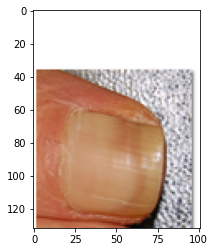

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import sys, cv2, numpy

filename = r'/content/drive/MyDrive/Project/C_A1_Onychomycosis-01/Onychomycosis_57_04_14.png'

img = cv2.imread(filename)

def checkEqual(lst):
    return len(set(lst)) <= 1 ## <-- This is the maximum length of the set

def removeColumns(image):
    for col in range(image.shape[1]):
        for ch in range(3):
            try:
                checkEqual(image[:, col, ch].tolist())
            except IndexError:
                continue
            else:
                if checkEqual(image[:, col, ch].tolist()):
                    try:
                        image = numpy.delete(image, col, 1)
                    except IndexError:
                        continue
                    else:
                        pass
    return image

img2 = removeColumns(img)

print(img.shape, img2.shape)

(132, 113, 3) (132, 101, 3)


In [ ]:
for tile in tiles:
    overlay = ImageDraw.Draw(tile.image)
    overlay.text((5, 5), str(tile.number), (255, 255, 255),
                 ImageFont.load_default())

#image_slicer.save_tiles(tiles)

In [ ]:
with zipfile.ZipFile(r'/content/drive/MyDrive/Project/tiles.zip', 'w') as zip:
    for tile in tiles:
        with io.BytesIO() as data:
            tile.save(data)
            zip.writestr(tile.generate_filename(path=False),
                         data.getvalue())

<ipython-input-60-50ef1798294c>:17: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_gray = rgb2gray(image_array)


Number of objects: 3676


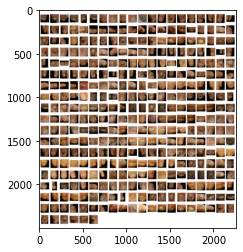

In [ ]:
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = Image.open(r'/content/drive/MyDrive/Project/L#NAIL#5nail#5nail2004_1#naildystrophy.png')

# Convert the image to a NumPy array
image_array = np.array(image)

# Convert the image to grayscale
image_gray = rgb2gray(image_array)

# Threshold the image to create a binary image
threshold = threshold_otsu(image_gray)
bw = image_gray > threshold

# Remove any small regions that are connected to the edge of the image
cleared = clear_border(bw)

# Label the image to identify individual objects
label_image = label(cleared)

# Count the number of objects in the image
n_objects = len(regionprops(label_image))

print(f'Number of objects: {n_objects}')

# Plot the image to visualize the objects
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
https://drive.google.com/drive/folders/1NqiGcFgM_wY0hVSK0ZaucXzhUcLsfwPr?usp=sharing

In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/1NqiGcFgM_wY0hVSK0ZaucXzhUcLsfwPr?usp=sharing"

gdown.download_folder(url, quiet=True, use_cookies=False)

Failed to retrieve folder contents:

 	The gdrive folder with url: https://drive.google.com/drive/folders/1Nq
	iGcFgM_wY0hVSK0ZaucXzhUcLsfwPr?usp=sharing has at least 50 files,
	gdrive can't download more than this limit, if you are ok with this,
	please run again with --remaining-ok flag. 

